In [1]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
import numpy as np
import random
from GeneticNeuralNetwork import network_to_array, array_to_state_dict, population_size
from Genetic_Algorithm3 import *
%matplotlib inline

In [2]:
class Network(nn.Module):
    def __init__(self, state_size, action_size):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(state_size,32)
        self.fc2 = nn.Linear(32,action_size)
    def forward(self, data):
        x = self.fc1(data)
        x = F.tanh(x)
        x = self.fc2(x)
        x = 2*F.tanh(x)
        return x

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
network = Network(3,1).to(device)
network.eval()
print(network)

Network(
  (fc1): Linear(in_features=3, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
)


In [3]:
env = gym.make("Pendulum-v0")
print("Action Space size :{}".format(env.action_space))
print("State Space size :{}".format(env.observation_space))

Action Space size :Box(1,)
State Space size :Box(3,)


In [4]:
def calculate_fitness(data, network, display = False):
    state_dict_population = array_to_state_dict(data, network)
    network.load_state_dict(state_dict_population)
    state = env.reset()
    score =  0  
    while True:
        if display: env.render()
        tensor_state = torch.from_numpy(state).float().to(device)
        action = network.forward(tensor_state).cpu().detach().numpy()[0]
        action = np.array(action, dtype=np.float32).reshape(1)
        next_state, reward, done, _ = env.step(action)  
        score += reward
        state = next_state
        if done:
            break
    return score

In [5]:
def population_generation(network, nos_pop): 
    return [list(np.random.randn(population_size(network))) for _ in range(nos_pop)]

In [10]:
SIZE = 10    #Size of each population
POP = 12    #Population in each batch
NOS_TOP = 4 #Number of top selected population per population
ITERATION = 1000 #Number of Iteration 
MAX_SCORE = 200 #Iteration at which it will stop updating

In [11]:
genetic_algo = GeneticAlgorithm(SIZE, POP, NOS_TOP, 9, population_generation, calculate_fitness, network, MAX_SCORE)

Population Class Initialised
Selection Initialised
Crossover Class Initialised
Mutaion Initialised
Plotting Initialised


In [12]:
genetic_algo.train(ITERATION)  ##TRAINING THE NETWORK

rent Maximum score of -0.06498420987686615
Iteration Number 723 with current Maximum score of -0.06498420987686615
Iteration Number 724 with current Maximum score of -0.06498420987686615
Iteration Number 725 with current Maximum score of -0.06498420987686615
Iteration Number 726 with current Maximum score of -0.06498420987686615
Iteration Number 727 with current Maximum score of -0.06498420987686615
Iteration Number 728 with current Maximum score of -0.06498420987686615
Iteration Number 729 with current Maximum score of -0.06498420987686615
Iteration Number 730 with current Maximum score of -0.06498420987686615
Iteration Number 731 with current Maximum score of -0.06498420987686615
Iteration Number 732 with current Maximum score of -0.06498420987686615
Iteration Number 733 with current Maximum score of -0.06498420987686615
Iteration Number 734 with current Maximum score of -0.06498420987686615
Iteration Number 735 with current Maximum score of -0.06498420987686615
Iteration Number 736 

No handles with labels found to put in legend.


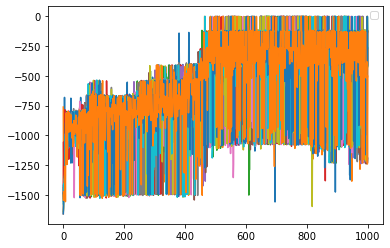

In [13]:
genetic_algo.multiplot.multi_plot()

In [33]:
state_dict = array_to_state_dict(genetic_algo.best_model, network)
network.load_state_dict(state_dict)

<All keys matched successfully>

In [37]:
state = env.reset()
score =  0  
while True:
    if display: env.render()
    tensor_state = torch.from_numpy(state).float().to(device)
    action = network.forward(tensor_state).cpu().detach().numpy()[0]
    action = np.array(action, dtype=np.float32).reshape(1)
    next_state, reward, done, _ = env.step(action)  
    score += reward
    state = next_state
    if done:
        break

In [36]:
env.close()

In [50]:
import math
-math.inf > 0

False